## Брагин Алексей. КЭ - 402

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
hiring_data = pd.read_csv('hiring-data.txt', sep='\t')

In [3]:
names = hiring_data['NAME']
hiring_data = hiring_data.drop(['NR', 'NAME'], axis=1)

In [6]:
hiring_data

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
0,10,10,9,10,10,10,9,10,10,9
1,10,10,4,10,5,5,4,5,4,3
2,5,4,10,5,10,4,10,5,3,10
3,10,10,9,10,10,10,9,10,10,9
4,4,3,5,4,3,10,4,10,10,5
5,10,10,4,10,5,4,3,4,5,5
6,4,4,5,5,4,10,5,10,10,6
7,4,5,3,4,5,10,4,10,10,4
8,4,5,10,4,10,5,10,4,3,10
9,10,10,4,10,5,4,4,5,4,4


In [68]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
def perform_agglomerative_clustering(depth, linkage, data, labels, xticks_rot='vertical'):
    model = AgglomerativeClustering(compute_distances=True, linkage=linkage)
    model = model.fit(data)
    
    plt.figure(figsize=(8, 6))
    plt.title(f'Hierarchical Clustering Dendrogram using "{linkage}" linkage')
    plot_dendrogram(model, truncate_mode='level', p=depth, labels=labels)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.xticks(rotation=xticks_rot)
    plt.show()

#### **Иерахрическая кластеризация данных о кандидатах**
На всех типах схожести все кандидаты разбиваются на 4 кластера

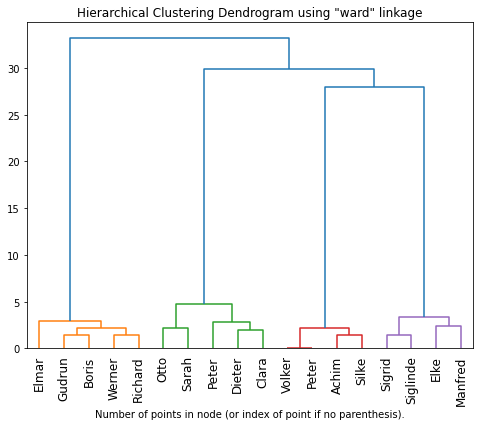

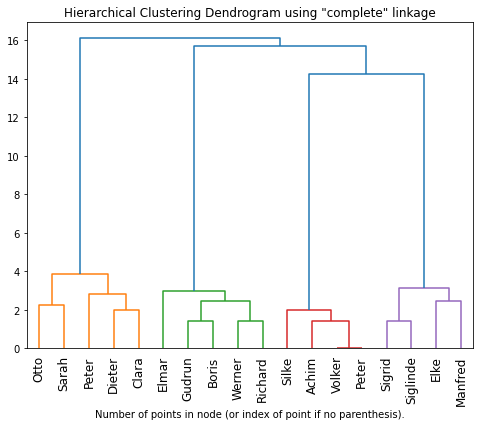

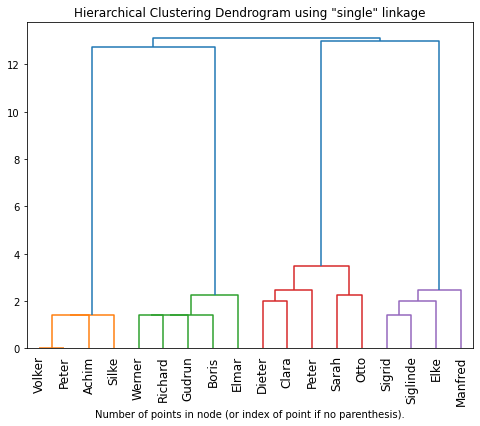

In [69]:
linkage = ['ward', 'complete', 'single']
for linkage_type in linkage:
    perform_agglomerative_clustering(6, linkage_type, hiring_data, names.values)

#### **На основе результатов иерахрическая кластеризации строится k-means кластеризация**
На графике отчетливо видны 4 кластера кандидатов

<ipython-input-47-041cdda54ac4>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


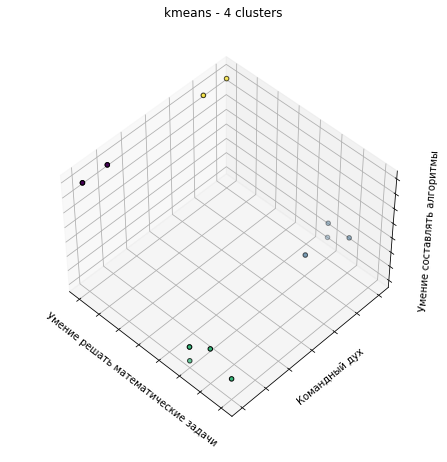

In [47]:
kmeans = KMeans(n_clusters=4).fit(hiring_data)
labels = kmeans.labels_

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(hiring_data['T2'], hiring_data['T6'], hiring_data['T4'], 
           c=labels.astype(float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Умение решать математические задачи')
ax.set_ylabel('Командный дух')
ax.set_zlabel('Умение составлять алгоритмы')
ax.set_title('kmeans - 4 clusters')
ax.dist = 12

fig.show()

In [64]:
customers_data = pd.read_csv('customers.csv')
customers_data = customers_data.dropna()
customers_ids = customers_data['CustomerId']
customers_data = customers_data.drop(['Row', 'CustomerId'], axis=1)

In [65]:
customers_data.head()

,Age,Education,YearsEmployed,Income,CardDebt,OtherDebt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


#### **Иерахрическая кластеризация данных о покупателях**
Наиболее подробное разбиение данных предоставляет тип схожести "ward". Он разбил данные на 3 кластера, в то время, как другие типы разбили данные на 2 кластера

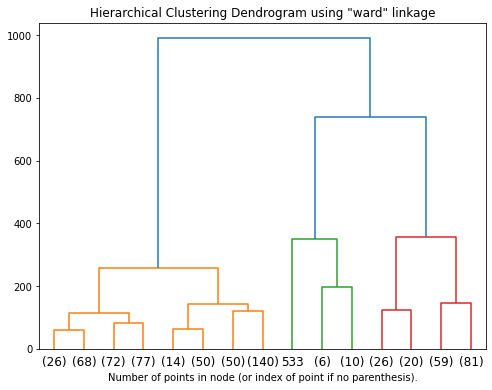

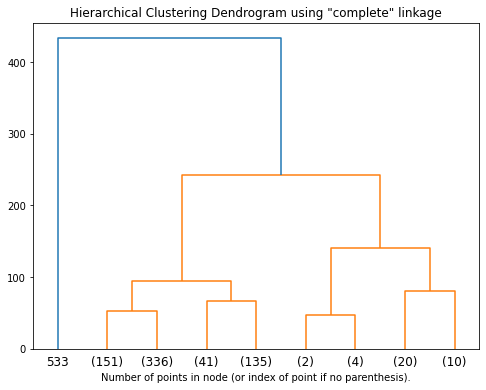

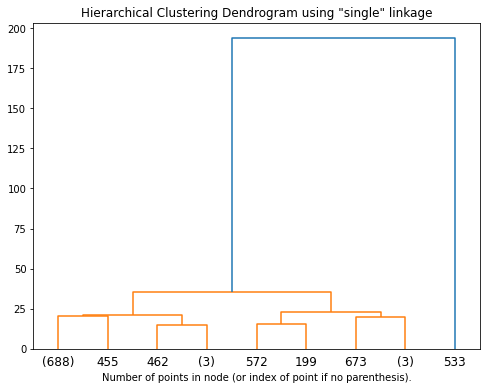

In [73]:
for linkage_type in linkage:
    perform_agglomerative_clustering(3, linkage_type, customers_data, 
                                     customers_ids.values, xticks_rot='horizontal')